In [1]:
import torch
import torch.utils.data as data
from torchvision import datasets, transforms
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from classes import CNN

In [2]:
device = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
trainset = datasets.SVHN("data/train", split="train", download = False)
#extraset = datasets.SVHN("data/extra", split="extra", download = True)

2


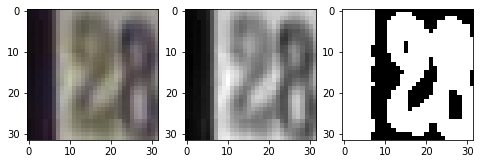

In [15]:
img,label = trainset.__getitem__(12)
fig = plt.figure(figsize=(8,8))
print(label)
fig.add_subplot(1,3,1)
img_np = np.array(img)
plt.imshow(img_np)

processed_img = cv2.cvtColor(img_np,cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(processed_img,127,255,cv2.THRESH_BINARY)[1]

fig.add_subplot(1,3,2)
plt.imshow(processed_img,cmap="gray")

fig.add_subplot(1,3,3)
plt.imshow(thresh,cmap="binary")

plt.show()

In [7]:
model = CNN()
model.load_state_dict(torch.load("model/mnist/model1.pth.",map_location=device))
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)
